In [34]:
#This notebook is to manually create a SVM model from scratch

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [57]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        '''
        This function plots the given data as negative and positive
        classes
        '''
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    def fit(self, data):
        '''
        This is the fit function for the svm
        transforms contains the list of transformations which can
        be applied to w. They can also be applied to b, but that is not
        done here for brevity
        '''
        #Training function to find w and b
        self.data = data
        opt_dict = {
            
        }
        
        transforms = [[1,1],
                     [-1,1],
                     [-1,-1],
                     [1,-1]]
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    #Append each feature given to the fit function to
                    #all data
                    all_data.append(feature)
        
        #Find the minimum and maximum values to bound step sizes
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        #Clear all data to remove it from memory
        all_data = None
        
        #The size of the steps decreases inversely proportionally to 
        #computation time
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     self.max_feature_value * 0.001,]
        
        #b can take larger steps than w for brevity
        b_range_multiple = 5
        
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        #Apply each transformation to an initialized W
        #Then, optimize W
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            optimized = False
            while(not optimized):
                for b in np.arange(-1 * (self.max_feature_value * b_range_multiple),
                    self.max_feature_value * b_range_multiple , step*b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        #This function must be run on all points
                        #yi ( xi dot w + b)
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                        
                        #At this point, if the option has been found,
                        #Append the transformed w and b to the optimized dict
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                #If w's latest optimum is less than 0, break the while loop
                if w[0] < 0:
                    optimized = True
                else:
                    w = w - step
            
            #Get the sorted list of all magnitudes
            norms = sorted([n for n in opt_dict])
            #The optimal choice will be the first sorted choice
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            
            #Reset the latest optimum using a smaller step size
            #if greater precision is needed, add smaller steps to
            #step_sizes by creating a new step an order of magnitude smaller
            #Note that sometimes problems cannot be optimized further
            latest_optimum = opt_choice[0][0] + step * 2
            
            
            
    
    def predict(self,features):
        #sign of x dot product w + b
        classification = np.sign(np.dot(np.array(features),self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', c = self.colors[classification])
            
        return classification
    
    
    
    def visualize(self):
        
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i]) for x in data_dict[i]] for i in data_dict]
        def hyperplane(x,w,b, v):
            '''
            This function actually defines the hyperplane in terms of
            the dot product of x and w plus b
            v is the values that we are seeking
            v = x * w + b
            '''

            return (-w[0] * x - b + v) / w[1]
        
        #Increase the datarange for beetter visualization
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
        hyperplane_x_min = datarange[0]
        hyperplane_x_max = datarange[1]

        #Positive support vector hyperplane
        psv1 = hyperplane(hyperplane_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyperplane_x_max, self.w, self.b, 1)
        self.ax.plot([hyperplane_x_min, hyperplane_x_max],[psv1,psv2])

        #Negative support vector hyperplane
        nsv1 = hyperplane(hyperplane_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyperplane_x_max, self.w, self.b, -1)
        self.ax.plot([hyperplane_x_min, hyperplane_x_max],[nsv1,nsv2])

        #Boundary
        db1 = hyperplane(hyperplane_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyperplane_x_max, self.w, self.b, 0)
        self.ax.plot([hyperplane_x_min, hyperplane_x_max],[db1,db2])
        
        plt.show()

In [53]:
data_dict = {
    -1:np.array([[1,7],
               [2,8],
               [3,8],]),
    1: np.array([[5,1],
               [6,-1],
               [7,3],])
}

before show
before show


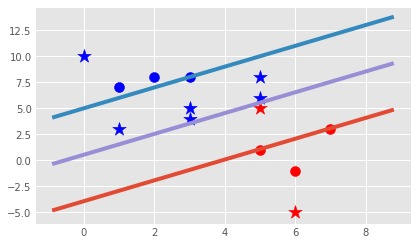

In [61]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
predict_vals = [
    [0,10],
    [1,3],
    [3,4],
    [3,5],
    [5,5],
    [5,6],
    [6,-5],
    [5,8]
]

for p in predict_vals:
    svm.predict(features = p)
svm.visualize()